In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('ElectricCarData_Clean.csv')
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [9]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [10]:
df.shape

(103, 14)

In [11]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [12]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [13]:
df.describe(include = 'all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103.000000,103.000000,103.000000,103.000000,103,103,103,103,103,103,103.000000,103.000000
unique,33,102,NaN,NaN,NaN,NaN,51,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,230,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,6,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.396117,179.194175,338.786408,189.165049,NaN,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,3.017430,43.573030,126.014444,29.566839,NaN,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,2.100000,123.000000,95.000000,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,5.100000,150.000000,250.000000,168.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,7.300000,160.000000,340.000000,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,9.000000,200.000000,400.000000,203.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


<AxesSubplot:xlabel='AccelSec', ylabel='Density'>

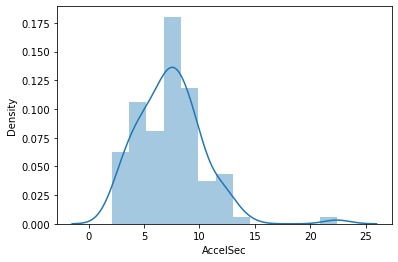

In [15]:
sns.distplot(df['AccelSec'])

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Density'>

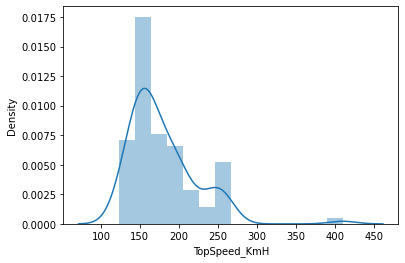

In [16]:
sns.distplot(df['TopSpeed_KmH'])

<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='count'>

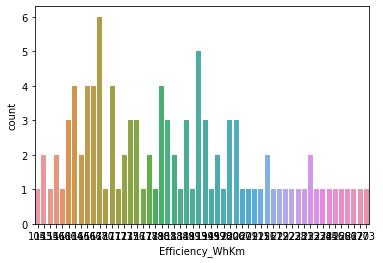

In [22]:

sns.countplot(df['Efficiency_WhKm'])

<AxesSubplot:xlabel='PowerTrain', ylabel='count'>

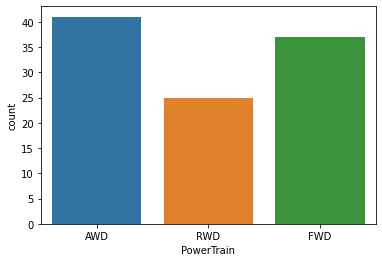

In [23]:
sns.countplot(df['PowerTrain'])

<AxesSubplot:xlabel='RapidCharge', ylabel='count'>

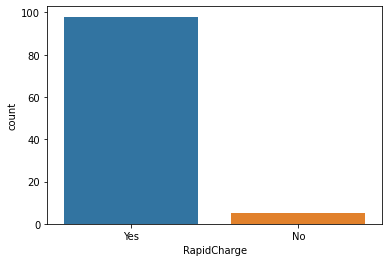

In [24]:
sns.countplot(df['RapidCharge'])

<AxesSubplot:xlabel='PlugType', ylabel='count'>

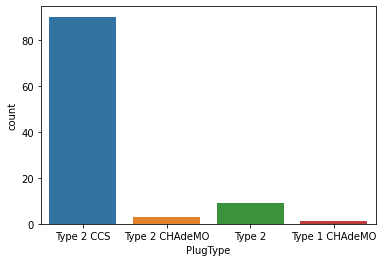

In [25]:
sns.countplot(df['PlugType'])

<AxesSubplot:xlabel='BodyStyle', ylabel='count'>

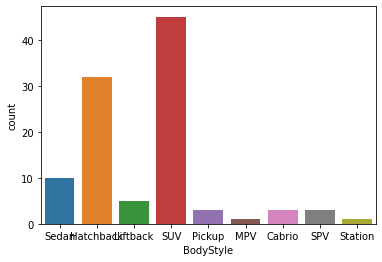

In [26]:
sns.countplot(df['BodyStyle'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

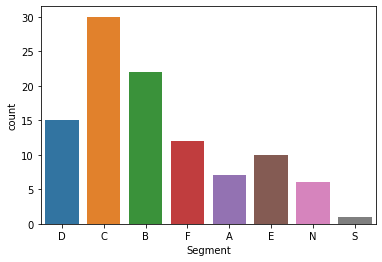

In [27]:
sns.countplot(df['Segment'])

<AxesSubplot:xlabel='PriceEuro', ylabel='Density'>

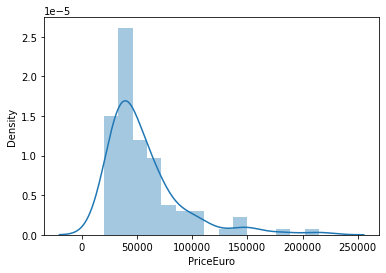

In [29]:
sns.distplot(df['PriceEuro'])